<a href="https://colab.research.google.com/github/Raushan787/Well-Test-Analysis/blob/main/Isochronal_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

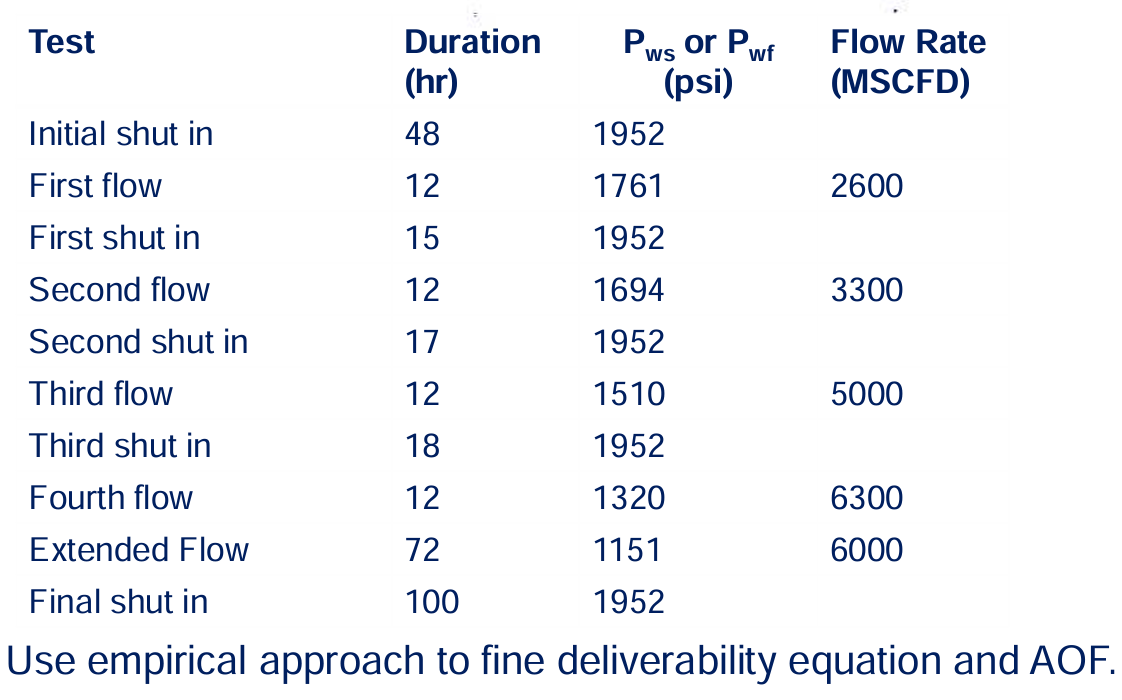



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
#F1->First Flow (1->number and F->Flow)
#S0-->Initial Shut-in(0->number and S->Shut in )
#EF->Extended flow
#FS->Final Shutr in
# Flow rates in appropriate units (e.g., MSCF/day)
# Pressure drawdowns in appropriate units (e.g., psi)
#Pressure for shut in -->Pws and for flow period -->Pwf

df=pd.DataFrame({"Test":["S0","F1","S1","F2","S2","F3","S3","F4","EF","FS"],
                 "Duration":["48","12","15","12","17","12","18","12","72","100"],
                 "Pressure":["1952","1761","1952","1694","1952","1510","1952","1320","1151","1952"],
                 "Flow_Rate":["0","2600","0","3300","0","5000","0","6300","6000","0"]
                 })

In [34]:
df

,Test,Duration,Pressure,Flow_Rate
0,S0,48,1952,0
1,F1,12,1761,2600
2,S1,15,1952,0
3,F2,12,1694,3300
4,S2,17,1952,0
5,F3,12,1510,5000
6,S3,18,1952,0
7,F4,12,1320,6300
8,EF,72,1151,6000
9,FS,100,1952,0


In [35]:
#Changing datatypes
df=df.astype({"Duration":int,"Pressure":int,"Flow_Rate":int})

In [36]:
Pbar=1952 #psi
df["Pbar^2-Pressure^2"]=Pbar**2-df["Pressure"]**2
df

,Test,Duration,Pressure,Flow_Rate,Pbar^2-Pressure^2
0,S0,48,1952,0,0
1,F1,12,1761,2600,709183
2,S1,15,1952,0,0
3,F2,12,1694,3300,940668
4,S2,17,1952,0,0
5,F3,12,1510,5000,1530204
6,S3,18,1952,0,0
7,F4,12,1320,6300,2067904
8,EF,72,1151,6000,2485503
9,FS,100,1952,0,0


In [37]:
df_iso=df[(df["Flow_Rate"]>0) & (df["Flow_Rate"]!=6000)]
df_iso

,Test,Duration,Pressure,Flow_Rate,Pbar^2-Pressure^2
1,F1,12,1761,2600,709183
3,F2,12,1694,3300,940668
5,F3,12,1510,5000,1530204
7,F4,12,1320,6300,2067904


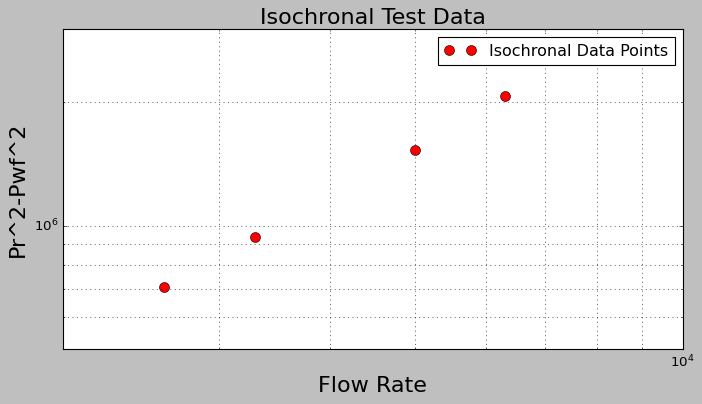

In [38]:

# Create the plot
plt.figure(figsize=(10, 5)) # Adjust figure size if needed
plt.loglog(df_iso["Flow_Rate"], df_iso["Pbar^2-Pressure^2"] ,"o",label='Isochronal Data Points',color="red", markersize="9")

# Add labels and title
plt.xlabel('Flow Rate',fontsize="20")
plt.ylabel('Pr^2-Pwf^2',fontsize="20")
plt.title('Isochronal Test Data',fontsize="20")
#Add limit for better visualibility
plt.xlim(2000, 10000)
plt.ylim(5*10**5,3*10**6)
# Add a legend
plt.legend(loc="best")
#Add the grid for better readability
plt.grid(True,which="both")

# Show the plot
plt.show()

#**Empirical Method**

**Qg=C(Pr^2-Pwf^2)^n**

log(Pr^2-Pwf^2)=log(Qg)/n +log(C)/n

In [39]:
from sklearn.linear_model import LinearRegression
x=(df_iso[["Flow_Rate"]])
y=(df_iso["Pbar^2-Pressure^2"])
lm=LinearRegression()
lm.fit(np.log10(x),np.log10(y))

LinearRegression()

In [40]:
y_hat=lm.predict(np.log10(x))

In [41]:
lm.score(np.log10(x),np.log10(y))

0.9995784520310913

In [42]:
#skope
m=lm.coef_[0]
m

np.float64(1.20218472996212)

In [43]:
#Intercept
lm.intercept_

np.float64(1.743696850452089)

<Axes: xlabel='Flow_Rate', ylabel='Pbar^2-Pressure^2'>

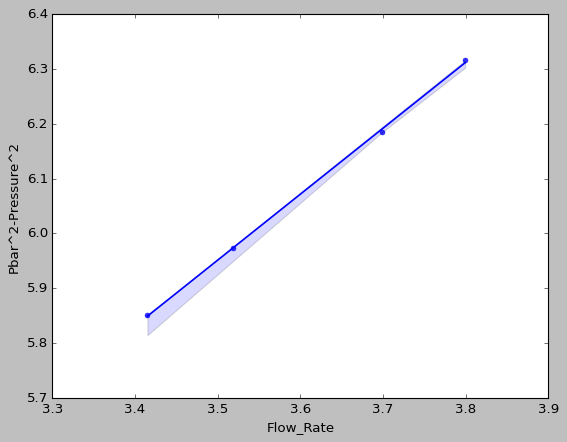

In [44]:
import seaborn as sns
sns.regplot(x=np.log10(x),y=np.log10(y))

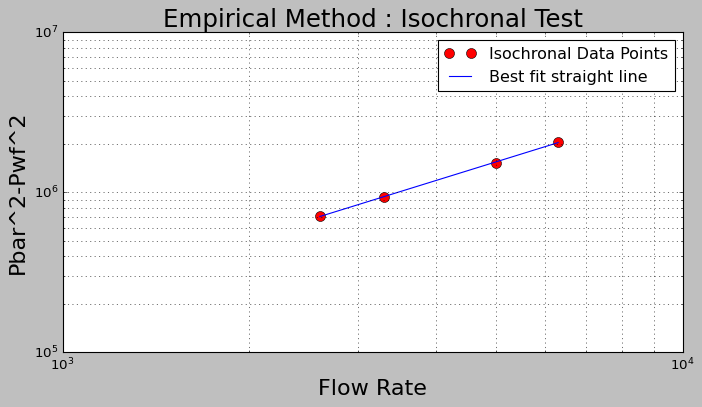

In [45]:
plt.figure(figsize=(10, 5))
plt.loglog(x,y ,"o",label='Isochronal Data Points',color="red", markersize="9")
plt.loglog(x,10**y_hat,label="Best fit straight line")
plt.xlabel("Flow Rate",fontsize="20")
plt.ylabel("Pbar^2-Pwf^2",fontsize="20")
plt.title("Empirical Method : Isochronal Test",fontsize="22")
plt.legend(loc="best")
plt.grid(True,which="both")


In [46]:
#Slope=1/n
n=1/m
n=np.round(n,3)
n

np.float64(0.832)

In [47]:
#For constant C ,we use extended flow
C=(df["Flow_Rate"].iloc[-2])/(Pbar**2-(df["Pressure"].iloc[-2])**2)**n
C=np.round(C,4)
C

np.float64(0.0287)

In [48]:
print("The deliverability equation is : Qg=",C,"X(Pbar^2-Pwf^2)^",n)

The deliverability equation is : Qg= 0.0287 X(Pbar^2-Pwf^2)^ 0.832


## **The deliverability equation is**##

## **Qg=0.0287*(Pr^2-Pwf^2)^0.832**##

## **log(Pr^2-Pwf^2)=(logQg -log0.0287)/0.832**##



In [49]:
#AOF calculation
Pwf_aof=14.7
AOF=C*(Pbar**2-Pwf_aof**2)**n
AOF=np.round(AOF,3)

In [50]:
print("Absolute open flow is :",AOF,"MSCFD")

Absolute open flow is : 8574.717 MSCFD


In [51]:
#Calculation for Extended flow(Stabilised Model)
x1=df["Flow_Rate"].iloc[-2]
y1=df["Pbar^2-Pressure^2"].iloc[-2]
Qg= range(10**3,10**4)
y2=10**(m*(np.log10(Qg)-np.log10(C)))


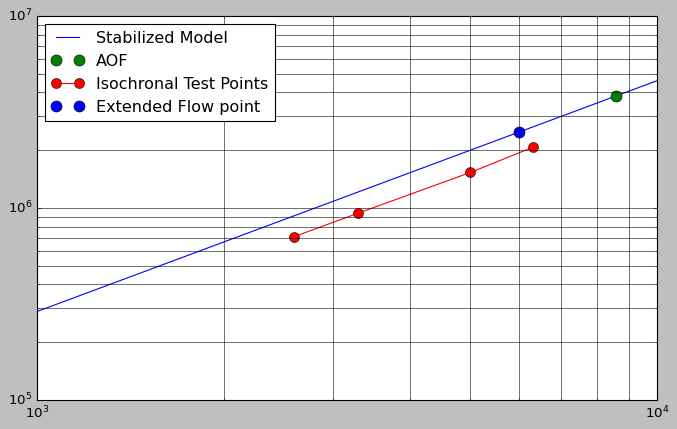

In [52]:
plt.figure(figsize=(10,6))
plt.style.use( 'classic')
plt.loglog(Qg,y2,label="Stabilized Model")
plt.loglog(AOF,Pbar**2-Pwf_aof**2,"o",markersize=10,label="AOF")
plt.loglog(x,y ,marker="o",label='Isochronal Test Points',color="red", markersize="9")
plt.loglog(x1,y1,"o",color="blue",markersize=10,label="Extended Flow point ")
plt.xlim(10**3,10**4)
plt.grid(True,which="both",linestyle="-")
plt.legend(loc="best")

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']